<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train_dataset  =  FashionMNIST(root = '.',train = True,transform=transforms.ToTensor(),download=True)
test_dataset  =  FashionMNIST(root = '.',train = False,transform=transforms.ToTensor(),download=True)

In [ ]:
test_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3,stride = 2),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride = 2),
        nn.ReLU(),
        nn.Conv2d(64,128,kernel_size=3,stride = 2),
        nn.ReLU(),
    )
    self.fullLayer = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(128*2*2,1024),
        nn.ReLU(),
        nn.Linear(1024,10)
    )

  def forward(self,x):
    x = self.conv(x)
    x = x.view(x.size(0),-1)
    x = self.fullLayer(x)
    return x

In [33]:
n_epochs = 100
batch_size = 128

In [ ]:
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
model = CNN().to(device)
optimizers = torch.optim.Adam(model.parameters(),lr = 0.01)

In [34]:
train_losses = []
test_losses = []
for ep in range(n_epochs):
  train_loss = []
  for inputs,targets in train_loader:
    optimizers.zero_grad()

    inputs,target = inputs.to(device),targets.to(device)

    output = model(inputs)
  
    loss = loss_fn(output,target)
    loss.backward()
    optimizers.step()
    train_loss.append(loss.item())
  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs_test,targets_test in test_loader:
    inputs_test,targets_test = inputs_test.to(device),targets_test.to(device)
    output_test = model(inputs_test)
    loss_test = loss_fn(output_test,targets_test)
    test_loss.append(loss_test.item())
  test_loss = np.mean(test_loss)

  train_losses.append(train_loss)
  test_losses.append(test_loss)
  print(f'Epoch {ep+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')



Epoch 1/100, Train Loss: 0.3511, Test Loss: 0.4480
Epoch 2/100, Train Loss: 0.3548, Test Loss: 0.4226
Epoch 3/100, Train Loss: 0.3473, Test Loss: 0.4183
Epoch 4/100, Train Loss: 0.3481, Test Loss: 0.4253
Epoch 5/100, Train Loss: 0.3479, Test Loss: 0.4418
Epoch 6/100, Train Loss: 0.3487, Test Loss: 0.4134
Epoch 7/100, Train Loss: 0.3399, Test Loss: 0.4493
Epoch 8/100, Train Loss: 0.3461, Test Loss: 0.4237
Epoch 9/100, Train Loss: 0.3380, Test Loss: 0.4529
Epoch 10/100, Train Loss: 0.3463, Test Loss: 0.4511
Epoch 11/100, Train Loss: 0.3572, Test Loss: 0.4436
Epoch 12/100, Train Loss: 0.3544, Test Loss: 0.4275
Epoch 13/100, Train Loss: 0.3310, Test Loss: 0.4403
Epoch 14/100, Train Loss: 0.3488, Test Loss: 0.4530
Epoch 15/100, Train Loss: 0.3551, Test Loss: 0.4363
Epoch 16/100, Train Loss: 0.3483, Test Loss: 0.4376
Epoch 17/100, Train Loss: 0.3532, Test Loss: 0.4359
Epoch 18/100, Train Loss: 0.3480, Test Loss: 0.4227
Epoch 19/100, Train Loss: 0.3354, Test Loss: 0.4268
Epoch 20/100, Train L

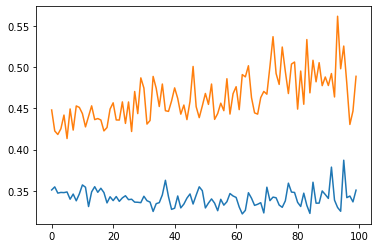

In [35]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.show()

In [37]:
n_correct = 0
n_total = 0
for inputs,targets in train_loader:
  inputs,target = inputs.to(device),targets.to(device)
  outputs = model(inputs)
  _,pred = torch.max(outputs,1)
  n_correct += (pred == target).sum().item()
  n_total += target.shape[0]
train_acc = n_correct/n_total
n_correct = 0
n_total = 0
for inputs,targets in test_loader:
  inputs,target = inputs.to(device),targets.to(device)
  outputs = model(inputs)
  _,pred = torch.max(outputs,1)
  n_correct += (pred == target).sum().item()
  n_total += target.shape[0]
test_acc = n_correct/n_total

In [38]:
train_acc,test_acc

(0.8719, 0.8449)